In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
df.head()

,coord,dec,g_central_image_pop_10px_rad,g_central_image_pop_15px_rad,g_central_image_pop_5px_rad,g_cmodel_mag,g_cmodel_magsigma,g_ellipticity,g_half_light_radius,g_isophotal_area,...,z_cmodel_magsigma,z_ellipticity,z_half_light_radius,z_isophotal_area,z_major_axis,z_minor_axis,z_peak_surface_brightness,z_petro_rad,z_pos_angle,z_sersic_index
0,"b'(179325.3125, 99694.8046875, -21178.96484375)'",-5.893433,1,1,1,20.314907,0.002624,0.147,6.047,603.0,...,0.001211,0.162,5.609,897.0,5.891,4.938,-8.2933,5.28,36.15,2.193
1,"b'(179236.609375, 99349.8203125, -23431.181640...",-6.522742,1,1,1,22.217360,0.010902,0.130,3.430,93.0,...,0.004421,0.129,3.697,206.0,3.117,2.713,-7.3657,5.94,-61.78,1.649
2,"b'(179281.5, 99283.5078125, -23368.759765625)'",-6.505290,1,1,1,21.148739,0.008013,0.209,6.597,254.0,...,0.002184,0.096,6.455,517.0,4.811,4.351,-7.6539,9.24,32.76,2.364
3,"b'(179365.171875, 99158.046875, -23259.0839843...",-6.474628,1,1,1,18.464205,0.001740,0.525,10.855,1064.0,...,0.001349,0.500,9.141,929.0,9.623,4.815,-8.5825,6.60,53.15,1.494
4,"b'(179366.421875, 99172.25, -23188.84765625)'",-6.454993,1,1,1,20.998287,0.006011,0.738,8.261,386.0,...,0.004283,0.725,6.788,381.0,8.292,2.279,-6.8798,5.94,21.16,1.063


In [5]:
print(df.isnull())

       coord    dec  g_central_image_pop_10px_rad  \
0      False  False                         False   
1      False  False                         False   
2      False  False                         False   
3      False  False                         False   
4      False  False                         False   
...      ...    ...                           ...   
40909  False  False                         False   
40910  False  False                         False   
40911  False  False                         False   
40912  False  False                         False   
40913  False  False                         False   

       g_central_image_pop_15px_rad  g_central_image_pop_5px_rad  \
0                             False                        False   
1                             False                        False   
2                             False                        False   
3                             False                        False   
4                      

In [6]:
columns_list = df.columns.tolist()
print(columns_list)


['coord', 'dec', 'g_central_image_pop_10px_rad', 'g_central_image_pop_15px_rad', 'g_central_image_pop_5px_rad', 'g_cmodel_mag', 'g_cmodel_magsigma', 'g_ellipticity', 'g_half_light_radius', 'g_isophotal_area', 'g_major_axis', 'g_minor_axis', 'g_peak_surface_brightness', 'g_petro_rad', 'g_pos_angle', 'g_sersic_index', 'i_central_image_pop_10px_rad', 'i_central_image_pop_15px_rad', 'i_central_image_pop_5px_rad', 'i_cmodel_mag', 'i_cmodel_magsigma', 'i_ellipticity', 'i_half_light_radius', 'i_isophotal_area', 'i_major_axis', 'i_minor_axis', 'i_peak_surface_brightness', 'i_petro_rad', 'i_pos_angle', 'i_sersic_index', 'object_id', 'r_central_image_pop_10px_rad', 'r_central_image_pop_15px_rad', 'r_central_image_pop_5px_rad', 'r_cmodel_mag', 'r_cmodel_magsigma', 'r_ellipticity', 'r_half_light_radius', 'r_isophotal_area', 'r_major_axis', 'r_minor_axis', 'r_peak_surface_brightness', 'r_petro_rad', 'r_pos_angle', 'r_sersic_index', 'ra', 'skymap_id', 'specz_dec', 'specz_flag_homogeneous', 'specz_ma

In [7]:
drop_cols = [
    'object_id', 'specz_name', 'coord', 'ra', 'dec',
    'specz_ra', 'specz_dec', 'x_coord', 'y_coord',
    'skymap_id', 'specz_flag_homogeneous'
]
df.drop(drop_cols,axis = 1,inplace=True)

In [8]:
df['halo_mass'] = 1.5 + 0.5 * (20 - df['i_cmodel_mag']) + 2.0 * np.log10(1 + df['specz_redshift'])


In [9]:

feature_cols = [
    # Photometric bands
    'g_central_image_pop_10px_rad', 'g_central_image_pop_15px_rad', 'g_central_image_pop_5px_rad',
    'g_cmodel_mag', 'g_cmodel_magsigma', 'g_ellipticity', 'g_half_light_radius', 'g_isophotal_area',
    'g_major_axis', 'g_minor_axis', 'g_peak_surface_brightness', 'g_petro_rad', 'g_pos_angle', 'g_sersic_index',
    'r_central_image_pop_10px_rad', 'r_central_image_pop_15px_rad', 'r_central_image_pop_5px_rad',
    'r_cmodel_mag', 'r_cmodel_magsigma', 'r_ellipticity', 'r_half_light_radius', 'r_isophotal_area',
    'r_major_axis', 'r_minor_axis', 'r_peak_surface_brightness', 'r_petro_rad', 'r_pos_angle', 'r_sersic_index',
    'i_central_image_pop_10px_rad', 'i_central_image_pop_15px_rad', 'i_central_image_pop_5px_rad',
    'i_cmodel_mag', 'i_cmodel_magsigma', 'i_ellipticity', 'i_half_light_radius', 'i_isophotal_area',
    'i_major_axis', 'i_minor_axis', 'i_peak_surface_brightness', 'i_petro_rad', 'i_pos_angle', 'i_sersic_index',
    'y_central_image_pop_10px_rad', 'y_central_image_pop_15px_rad', 'y_central_image_pop_5px_rad',
    'y_cmodel_mag', 'y_cmodel_magsigma', 'y_ellipticity', 'y_half_light_radius', 'y_isophotal_area',
    'y_major_axis', 'y_minor_axis', 'y_peak_surface_brightness', 'y_petro_rad', 'y_pos_angle', 'y_sersic_index',
    'z_central_image_pop_10px_rad', 'z_central_image_pop_15px_rad', 'z_central_image_pop_5px_rad',
    'z_cmodel_mag', 'z_cmodel_magsigma', 'z_ellipticity', 'z_half_light_radius', 'z_isophotal_area',
    'z_major_axis', 'z_minor_axis', 'z_peak_surface_brightness', 'z_petro_rad', 'z_pos_angle', 'z_sersic_index',
    
    # Spectroscopic
    'specz_redshift', 'specz_redshift_err', 'specz_mag_i'
]

X = df[feature_cols]       
y = df['halo_mass']       


print(X.shape)  
print(y.shape)  


(40914, 73)
(40914,)


In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

x_train_norm = StandardScaler().fit_transform(x_train)
x_train_norm[:5]
x_test_norm = StandardScaler().fit_transform(x_test)

In [12]:


param_grid = {
    'max_depth': [6, 8],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [500],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
    
}



In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    XGBRegressor(
        random_state=42,
        tree_method='hist',  
        device='cuda',       
        verbosity=0
    ),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

grid.fit(x_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best R2 score:", grid.best_score_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.8}
Best R2 score: 0.9989896147638658


In [14]:
y_pred = grid.predict(x_test)


In [15]:
print(y_test[0:15],y_pred[0:15])

25526    1.942031
1077     0.939006
40410    0.049008
24470    3.064593
15454    0.900836
34060    3.157209
29034    1.700434
19948    2.685214
9842     1.520594
12995    1.486546
14774    2.170404
39477    2.392394
19393    2.132722
22236    3.177882
35095    1.439397
Name: halo_mass, dtype: float64 [1.9501456  0.9325826  0.03617477 3.0641992  0.90799594 3.1643095
 1.7282351  2.6834993  1.5645607  1.470092   2.1738596  2.386222
 2.1614144  3.1711774  1.421071  ]


In [16]:

print("R2:", r2_score(y_test, y_pred))
print("RMSE:",mean_squared_error(y_test, y_pred, squared=False))


R2: 0.9992405819931099
RMSE: 0.02187265608781461


c:\Users\ASUS\OneDrive\Desktop\New folder\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_train_pred = grid.best_estimator_.predict(x_train)
y_test_pred = grid.best_estimator_.predict(x_test)

print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))


Train R2: 0.9997897501761569
Test R2: 0.9992405819931099
Train RMSE: 0.011354595910435453
Test RMSE: 0.02187265608781461


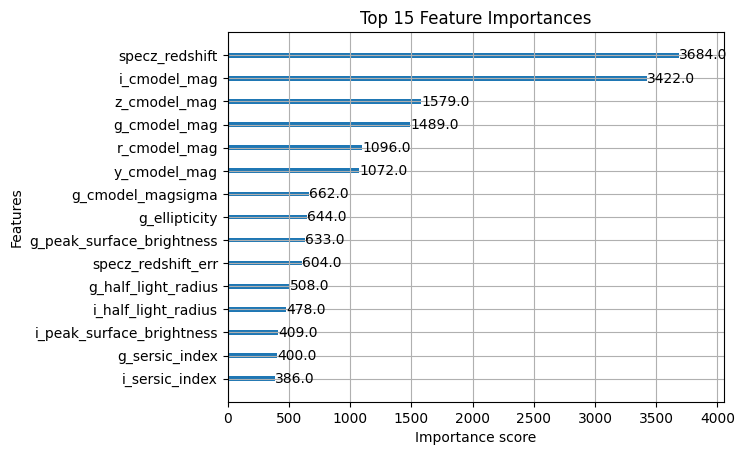

In [18]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(grid.best_estimator_, max_num_features=15)
plt.title("Top 15 Feature Importances")
plt.show()


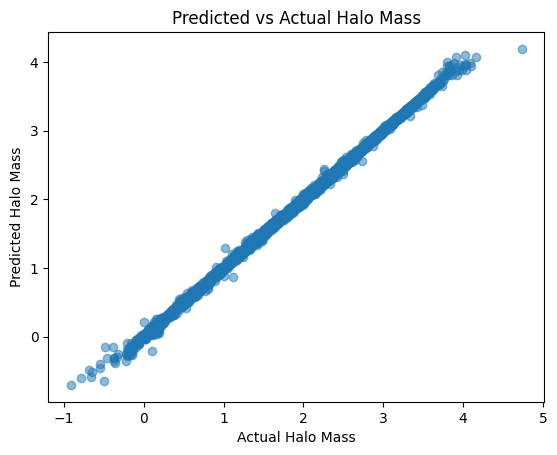

In [19]:
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual Halo Mass")
plt.ylabel("Predicted Halo Mass")
plt.title("Predicted vs Actual Halo Mass")
plt.show()


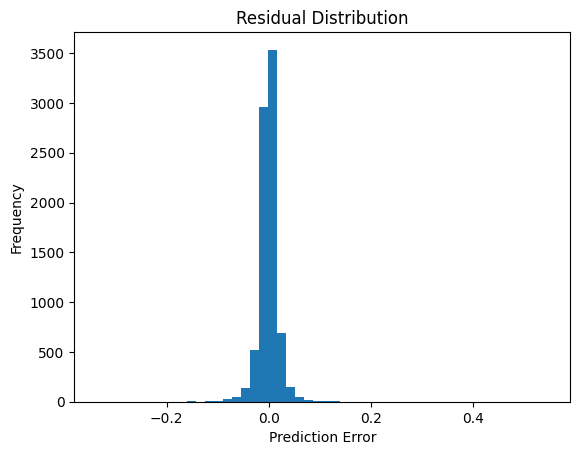

In [20]:
residuals = y_test - y_test_pred
plt.hist(residuals, bins=50)
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()


In [24]:
import pickle
import os

os.makedirs("model", exist_ok=True)

with open("model/xgb_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("XGBoost model saved!")


XGBoost model saved!


In [25]:
import pickle
import os

os.makedirs("data_scaler", exist_ok=True)


with open("data_scaler/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Scaler saved!")


Scaler saved!
